# Data summary of braking vehicle

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import tikzplotlib

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [3]:
# Load the data
lead_braking_edge = pd.read_csv('data/lead_braking_edge.csv', index_col=0)
lead_braking_normal = pd.read_csv('data/lead_braking_normal.csv', index_col=0)

In [4]:
# Print data information
print(f"Summary of normal data:\n{lead_braking_normal.describe()}\n")
print(f"Summary of edge data:\n{lead_braking_edge.describe()}\n")

frac_edge_in_normal = 100 * (lead_braking_normal['ego_min_acc'] <= -1).sum() / len(lead_braking_normal)
print(f"Fraction of edge cases (ego_min_acc <= -1) in normal data: {frac_edge_in_normal:.2f}%")




Summary of normal data:
       mean_deceleration  speed_difference   speed_end  ego_min_acc
count         300.000000        300.000000  300.000000   300.000000
mean            0.777821          3.239811   18.874311    -0.911622
std             0.575842          3.094034    8.234485     0.920389
min             0.092625          0.154683   -0.102620    -3.936266
25%             0.382464          1.379625   12.883082    -1.446889
50%             0.552820          2.108231   19.491089    -0.651786
75%             0.982632          3.715471   25.450312    -0.244020
max             3.177208         16.890781   37.079241     1.167057

Summary of edge data:
       mean_deceleration  speed_difference   speed_end  ego_min_acc
count         227.000000        227.000000  227.000000   227.000000
mean            0.975209          5.221208   12.548798    -1.593761
std             0.545494          3.341097    5.978883     0.517042
min             0.141509          0.161320    0.435511    -3.302702
2

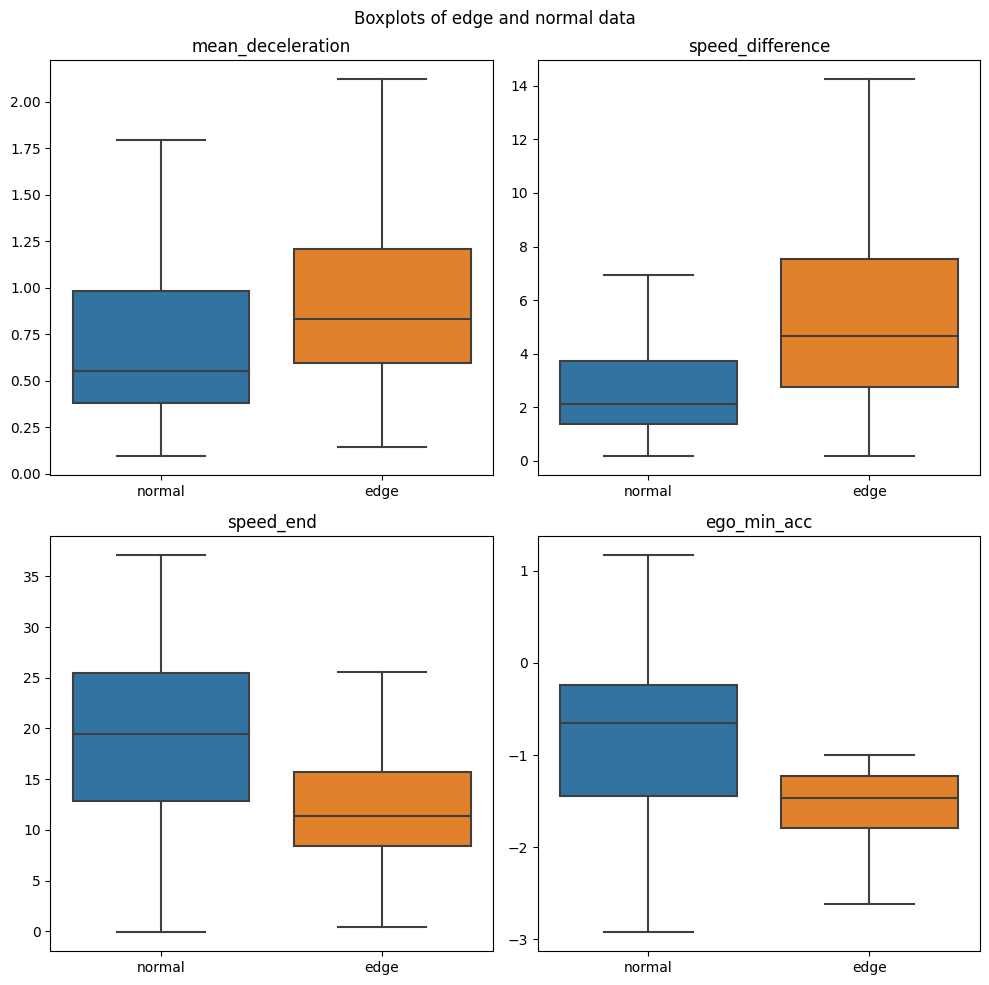

In [6]:
# Create boxplots
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10),layout='tight')
fig.suptitle('Boxplots of edge and normal data')

for column_name, ax in zip(lead_braking_normal.columns, axes.ravel()):
    sns.boxplot([lead_braking_normal[column_name], 
                lead_braking_edge[column_name]],showfliers=False,
                ax=ax).set(title=column_name, xticklabels=['normal','edge'])
    
# for column_name, ax in zip(lead_braking_normal.columns, axes.ravel()):
#     fig, axes = plt.subplots(1, figsize=(1.9,1.9), layout='tight')
#     title = column_name.replace('_', ' ')
#     sns.boxplot([lead_braking_normal[column_name],
#                 lead_braking_edge[column_name]],showfliers=False, ax=axes).set(xticklabels=['normal','edge'])
#     plt.savefig(f"img/{column_name}-boxplt.pgf")


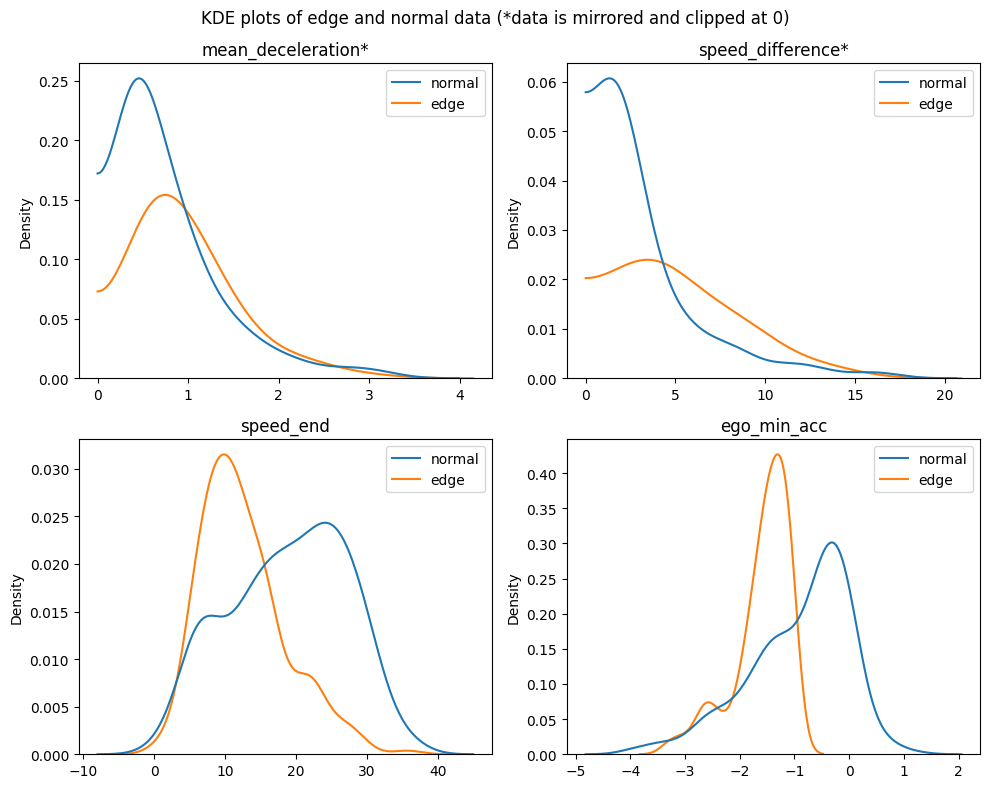

In [7]:

# Create KDE plots
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8), layout='tight')
fig.suptitle('KDE plots of edge and normal data (*data is mirrored and clipped at 0)')

for column_name, ax in zip(lead_braking_normal.columns, axes.ravel()):
        clip = (-100, 100)
        normal = lead_braking_normal[column_name]
        edge = lead_braking_edge[column_name]
        
        # If column is not min_acc, morror data and change clip
        if column_name not in ['ego_min_acc','speed_end']:
                column_name += '*'
                clip = (0, 100)
                normal = pd.concat((normal, normal.apply(lambda x: x * -1)))
                edge = pd.concat((edge, edge.apply(lambda x: x * -1)))
                 
        sns.kdeplot({'normal': normal.to_numpy(),
                    'edge': edge.to_numpy()}, clip=clip,
                    ax=ax).set(title=column_name)

### Observations
- Most difference between edge and normal data observed in `speed_end` and `ego_min_acc`
- In `mean_deceleration` somewhat the same distribution can be observed
- Quite a large fraction of the normal data contains "special event data": 40.33% where `ego_min_acc <= -1`

### Data
- 
- 
- Generate data, simulated
- Assume a distribution and draw samples from distribution
- 